In [1]:
#from google.colab import drive
#drive.mount('/content/drive')


In [2]:
import tensorflow as tf
gpus = tf.config.list_physical_devices("GPU")
if gpus:
    for gpu in gpus:
        print("Found a GPU with the name:", gpu)
else:
    print("Failed to detect a GPU.")

Found a GPU with the name: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [3]:
!pip install mtcnn

In [4]:
import cv2 as cv
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [5]:
img = cv.imread("C:/Users/admin/Documents/23MCS1004/lfw-deepfunneled/lfw-deepfunneled/Ben_Broussard/Ben_Broussard_0001.jpg")
# opencv BGR channel format and plt reads images as RGB channel format

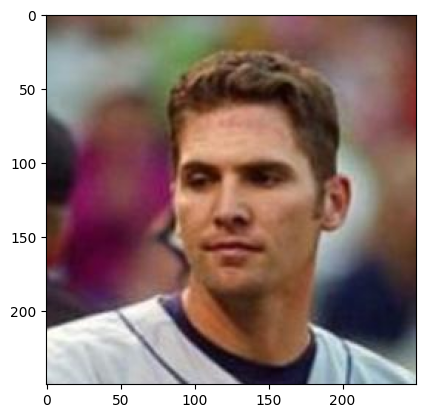

In [6]:
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img) # RGB

In [7]:
from mtcnn.mtcnn import MTCNN

detector = MTCNN()
results = detector.detect_faces(img)

In [8]:
results

[{'box': [89, 62, 93, 122],
  'confidence': 0.9999804496765137,
  'keypoints': {'left_eye': (104, 112),
   'right_eye': (146, 111),
   'nose': (119, 135),
   'mouth_left': (108, 157),
   'mouth_right': (146, 158)}}]

In [9]:
x,y,w,h = results[0]['box']

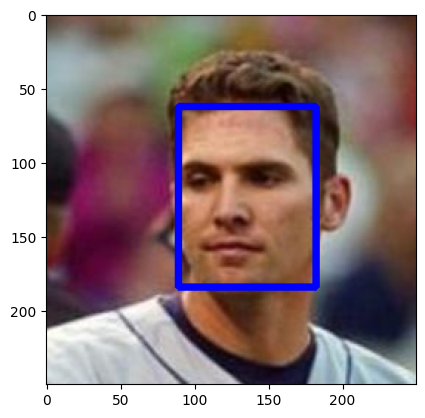

In [10]:
img = cv.rectangle(img, (x,y), (x+w, y+h), (0,0,255), 3)
plt.imshow(img)

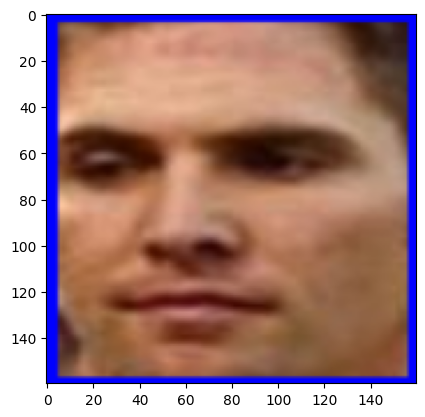

In [11]:
my_face = img[y:y+h, x:x+w]
#Facenet takes as input 160x160
my_face = cv.resize(my_face, (160,160))
plt.imshow(my_face)

In [12]:
my_face

array([[[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       ...,

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]]

Automate the preprocessing

In [13]:
class FACELOADING:
    def __init__(self, directory):
        self.directory = directory
        self.target_size = (160,160)
        self.X = []
        self.Y = []
        self.detector = MTCNN()


    def extract_face(self, filename):
        img = cv.imread(filename)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        x,y,w,h = self.detector.detect_faces(img)[0]['box']
        x,y = abs(x), abs(y)
        face = img[y:y+h, x:x+w]
        face_arr = cv.resize(face, self.target_size)
        return face_arr


    def load_faces(self, dir):
        FACES = []
        for im_name in os.listdir(dir):
            try:
                path = dir + im_name
                single_face = self.extract_face(path)
                FACES.append(single_face)
            except Exception as e:
                pass
        return FACES

    def load_classes(self):
        for sub_dir in os.listdir(self.directory):
            path = self.directory +'/'+ sub_dir+'/'
            FACES = self.load_faces(path)
            labels = [sub_dir for _ in range(len(FACES))]
            print(f"Loaded successfully: {len(labels)}")
            self.X.extend(FACES)
            self.Y.extend(labels)

        return np.asarray(self.X), np.asarray(self.Y)


    def plot_images(self):
        plt.figure(figsize=(18,16))
        for num,image in enumerate(self.X):
            ncols = 3
            nrows = len(self.Y)//ncols + 1
            plt.subplot(nrows,ncols,num+1)
            plt.imshow(image)
            plt.axis('off')

In [14]:
faceloading = FACELOADING("C:/Users/admin/Documents/23MCS1004/lfw-deepfunneled/lfw-deepfunneled")
X, Y = faceloading.load_classes()

Loaded successfully: 1
Loaded successfully: 1
Loaded successfully: 1
Loaded successfully: 4
Loaded successfully: 1
Loaded successfully: 2
Loaded successfully: 1
Loaded successfully: 1
Loaded successfully: 1
Loaded successfully: 1
Loaded successfully: 1
Loaded successfully: 2
Loaded successfully: 4
Loaded successfully: 1
Loaded successfully: 4
Loaded successfully: 1
Loaded successfully: 3
Loaded successfully: 19
Loaded successfully: 1
Loaded successfully: 2
Loaded successfully: 1
Loaded successfully: 1
Loaded successfully: 1
Loaded successfully: 4
Loaded successfully: 3
Loaded successfully: 1
Loaded successfully: 1
Loaded successfully: 1
Loaded successfully: 1
Loaded successfully: 1
Loaded successfully: 1
Loaded successfully: 1
Loaded successfully: 1
Loaded successfully: 1
Loaded successfully: 4
Loaded successfully: 2
Loaded successfully: 1
Loaded successfully: 3
Loaded successfully: 1
Loaded successfully: 3
Loaded successfully: 2
Loaded successfully: 1
Loaded successfully: 1
Loaded suc

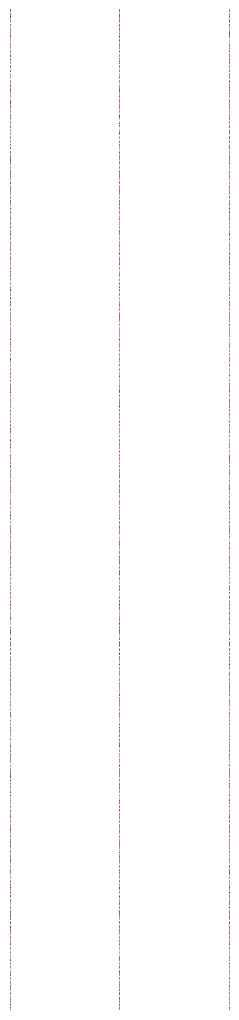

In [15]:
plt.figure(figsize=(4,13))
for num,image in enumerate(X):
    ncols = 3
    nrows = len(Y)//ncols + 1
    plt.subplot(nrows,ncols,num+1)
    plt.imshow(image)
    plt.axis('off')

FaceNet part

In [16]:
!pip install keras-facenet

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10387 sha256=2162afcfaa83819db0a6e599599676abd8aa131ee29211fce0bb6a21a3dc90e1
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\1d\d8\a9\85cf04ea29321d2afcb82c0caaafdca9195385f9d68cbc7185
Successfully built keras-facenet


In [17]:
from keras_facenet import FaceNet
embedder = FaceNet()

def get_embedding(face_img):
    face_img = face_img.astype('float32') # 3D(160x160x3)
    face_img = np.expand_dims(face_img, axis=0)
    # 4D (Nonex160x160x3)
    yhat= embedder.embeddings(face_img)
    return yhat[0] # 512D image (1x1x512)

In [18]:
EMBEDDED_X = []

for img in X:
    EMBEDDED_X.append(get_embedding(img))

EMBEDDED_X = np.asarray(EMBEDDED_X)

In [19]:
np.savez_compressed('faces_embeddings_done_4classes.npz', EMBEDDED_X, Y)

In [20]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
encoder.fit(Y)
Y=encoder.transform(Y)

Text(0, 0.5, '2')

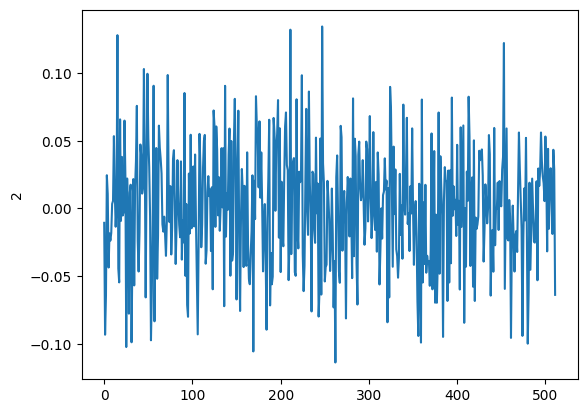

In [21]:
plt.plot(EMBEDDED_X[0])
plt.ylabel(Y[0])

In [22]:
Y

array([   2,    3,    4, ..., 5515, 5516, 5517])

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(EMBEDDED_X, Y, shuffle=True, random_state=17)

In [24]:
from sklearn.metrics import accuracy_score
import cv2 as cv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Assuming you have X, Y, and detector defined

# Split the data into training, validation, and test sets
X_train, X_temp, Y_train, Y_temp = train_test_split(EMBEDDED_X, Y, test_size=0.4, random_state=17, shuffle=True)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=17, shuffle=True)

# Create KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=3)

# Train the KNN model on the training set
knn_model.fit(X_train, Y_train)

# Predictions on the training set
ypreds_train = knn_model.predict(X_train)

# Predictions on the validation set
ypreds_val = knn_model.predict(X_val)

# Predictions on the test set
ypreds_test = knn_model.predict(X_test)
from sklearn.metrics import accuracy_score
import cv2 as cv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Assuming you have X, Y, and detector defined

# Split the data into training, validation, and test sets
X_train, X_temp, Y_train, Y_temp = train_test_split(EMBEDDED_X, Y, test_size=0.4, random_state=17, shuffle=True)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=17, shuffle=True)

# Create KNN classifiers with different values of neighbors (k)
k_values = [3, 5, 7]  # You can modify this list with different values
for k in k_values:
    # Create KNN classifier
    knn_model = KNeighborsClassifier(n_neighbors=k)

    # Train the KNN model on the training set
    knn_model.fit(X_train, Y_train)

    # Predictions on the training set
    ypreds_train = knn_model.predict(X_train)

    # Predictions on the validation set
    ypreds_val = knn_model.predict(X_val)

    # Predictions on the test set
    ypreds_test = knn_model.predict(X_test)

    # Evaluate the model
    accuracy_train = accuracy_score(Y_train, ypreds_train)
    accuracy_val = accuracy_score(Y_val, ypreds_val)
    accuracy_test = accuracy_score(Y_test, ypreds_test)

    print(f"Results for k={k}:")
    print(f"  Accuracy on training set: {accuracy_train}")
    print(f"  Accuracy on validation set: {accuracy_val}")
    print(f"  Accuracy on test set: {accuracy_test}")
    print()

Results for k=3:
  Accuracy on training set: 0.7213477299336543
  Accuracy on validation set: 0.5122902848224736
  Accuracy on test set: 0.5251658213031604

Results for k=5:
  Accuracy on training set: 0.64368414205802
  Accuracy on validation set: 0.4865392118611003
  Accuracy on test set: 0.49707374170893487

Results for k=7:
  Accuracy on training set: 0.5955509301417978
  Accuracy on validation set: 0.462348809988295
  Accuracy on test set: 0.4740538431525556



In [25]:
import pickle
#save the model
with open('knn_model_160x160.pkl','wb') as f:
    pickle.dump(knn_model,f)